In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy as sp
from scipy import stats

def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/(len(y)*xi2-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])



# Caracterización de el mechero

Para esto se necesita medir $\frac{dQ}{dt}$ que el mechero entrega al sistema, considerando la ecuación



pendiente 87.69565642034223 Error 0.06648793659152546
Punto de corte 16903.95186500709 Error 9.106590326084408


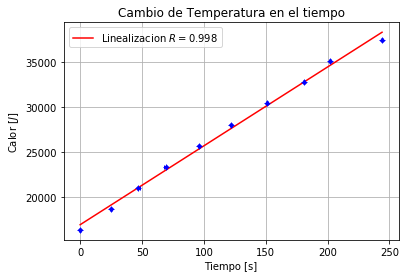

In [35]:
T = np.array([35.,40.,45.,50.,55.,60.,65.,70.,75.,80.])
t = np.array([0.,25.,47.,69.,96.,122.,151.,181.,202.,244.])

def Q(T):
    magua = 100.; malu = 54.9 # gramos
    cagua = 4.182 ; calu = 0.896 # J/(gC)
    return (magua*cagua + malu*calu)*T

dQ = Q(T)*np.sqrt((0.1/100.)**2+(0.1/54.9)**2)


T1Err=dQ; taErr=1 
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(t,Q(T))
polynomial = np.poly1d([slope, intercept])
line = polynomial(t)
plt.plot(t, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value)) 
plt.errorbar(t, Q(T), T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)


plt.plot(t,Q(T),"b.")
plt.grid(True)
plt.title("Cambio de Temperatura en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Calor [$J$] ")
plt.legend()
plt.savefig("calor.pdf")

print "pendiente",slope, "Error",Error_linealizacion(t,T)[1]
print "Punto de corte", intercept, "Error",Error_linealizacion(t,T)[0]

Ahora se calcula la eficiencia de cada motor, empezando por el motor en el cual se utiliza el mechero, tomamos la eficiencia como 

$$\eta = \frac{|W|}{|Q_{H}|} = \frac{|Q_{H}|-|Q_{c}|}{|Q_{H}|}=1-\frac{|Q_{c}|}{|Q_{H}|}$$

+ El número total de unidades de calor absorbido por el sistema $|Q_{H}|$
+ El número total de unidades de calor cedido por el sistema $|Q_{c}|$
+ Numero total de unidades de trabajo realizado por el sistema $|W|$

La expresión que se debe calcular en partiular para el sistema está dado por 

$$\eta_{Max} = 1- \frac{T_{c}}{T_{H}}$$

In [54]:
Tfrio = np.array([23.7,24.0,24.3,24.4,24.6,24.9,25.,25.3,25.5,25.7,])-0.5
Tcal = np.array([64.5,64.7,64.8,65.,65.,65.,65.,65.1,65.1,65.2,])

def emax(Tfrio,Tcal):
    return 1-(Tfrio/Tcal)
def emaxincertidumbre(Tfrio,Tcaliente):
    emax(Tfrio,Tcal)*np.sqrt((0.1/Tfrio)**2 + (0.1/Tcaliente)**2 )

print emax(Tfrio,Tcal)

print np.mean(Tfrio),"   ",np.mean(Tcal),"  ",np.mean(emax(Tfrio,Tcal))

[0.64031008 0.63678516 0.63271605 0.63230769 0.62923077 0.62461538
 0.62307692 0.61904762 0.61597542 0.61349693]
24.24     64.94000000000001    0.6267562032410339


In [39]:
print "Eficiencia", np.mean(emax(Tfrio,Tcal)),"Error",np.std(emax(Tfrio,Tcal)) 

Eficiencia 0.6267562032410339 Error 0.008522474837472531


In [25]:
Tfrio

array([23.2, 23.5, 23.8, 23.9, 24.1, 24.4, 24.5, 24.8, 25. , 25.2])

In [28]:
Tfrio - 0.5

array([22.7, 23. , 23.3, 23.4, 23.6, 23.9, 24. , 24.3, 24.5, 24.7])

In [85]:
(8)**2 / 1.

64.0

# Frigorífico

In [93]:
# 8V
Tf8 = np.array([28.9,28.9,28.8,28.8,28.8])-0.5
Tc8 = np.array([36.,36.1,36.1,36.2,36.2])

#9V
Tf9 = np.array([28.9,28.8,28.9,29.,29.1])-0.5
Tc9 = np.array([36.8,36.8,36.9,37.1,37.2])

#10V
Tf10 = np.array([29.2,29.3,29.4])-0.5
Tc10 = np.array([37.6,37.7,37.6])

#11V
Tf11 = np.array([29.6,29.7,29.8,29.9,30.9])-0.5
Tc11 = np.array([38.3,38.4,38.5,38.6,38.7])

#12V
Tf12 = np.array([29.9,30.0,30.1])-0.5
Tc12 = np.array([38.9,39.1,39.2])


def efrigo(Tf,Tc):
    return  Tf/(Tc-Tf)

In [94]:
print "8V" ,"Eficiencia", np.mean(efrigo(Tf8,Tc8)),"Error",np.std(efrigo(Tf8,Tc8)), "TA",np.mean(Tf8),"TB",np.mean(Tc8)
print "9V" ,"Eficiencia", np.mean(efrigo(Tf9,Tc9)),"Error",np.std(efrigo(Tf9,Tc9)), "TA",np.mean(Tf9),"TB",np.mean(Tc9)
print "10V" ,"Eficiencia", np.mean(efrigo(Tf10,Tc10)),"Error",np.std(efrigo(Tf10,Tc10)), "TA",np.mean(Tf10),"TB",np.mean(Tc10) 
print "11V" ,"Eficiencia", np.mean(efrigo(Tf11,Tc11)),"Error",np.std(efrigo(Tf11,Tc11)), "TA",np.mean(Tf11),"TB",np.mean(Tc11)
print "12V" ,"Eficiencia", np.mean(efrigo(Tf12,Tc12)),"Error",np.std(efrigo(Tf12,Tc12)), "TA",np.mean(Tf12),"TB",np.mean(Tc12)

8V Eficiencia 3.6435831767610574 Error 0.06074682429541624 TA 28.339999999999996 TB 36.11999999999999
9V Eficiencia 3.338215099993486 Error 0.023069373217582227 TA 28.439999999999998 TB 36.96
10V Eficiencia 3.2608377459210462 Error 0.043377673082935185 TA 28.8 TB 37.63333333333333
11V Eficiencia 3.276008381351493 Error 0.1936264424716024 TA 29.48 TB 38.5
12V Eficiencia 3.083662280701754 Error 0.00891108556129875 TA 29.5 TB 39.06666666666667


In [95]:
np.std(Tf8)

0.048989794855662516

In [120]:
(3.64+3.33+3.26+3.27+3.08)/5

3.316